In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cic-ids/cleaned_data1.csv')

# Feature Engineering and Scaling





In [ ]:
df.drop('Dst Port', axis='columns')

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Protocol_17,Protocol_6
0,112641719,3,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,56320859.5,139.300036,56320958,56320761,0,0,0
1,112641466,3,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,56320733.0,114.551299,56320814,56320652,0,0,0
2,112638623,3,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,56319311.5,301.934596,56319525,56319098,0,0,0
3,6453966,15,10,1239,2273,744,0,82.600000,196.741237,976,...,0.0,0,0,0.0,0.000000,0,0,0,0,1
4,8804066,14,11,1143,2209,744,0,81.642857,203.745545,976,...,0.0,0,0,0.0,0.000000,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145720,3982183,14,8,1442,1731,725,0,103.000000,191.125412,1179,...,0.0,0,0,0.0,0.000000,0,0,0,0,1
3145721,3802316,14,8,1440,1731,725,0,102.857143,191.172841,1179,...,0.0,0,0,0.0,0.000000,0,0,0,0,1
3145722,4004239,14,8,1459,1731,741,0,104.214286,195.113450,1179,...,0.0,0,0,0.0,0.000000,0,0,0,0,1
3145723,3998435,14,8,1459,1731,741,0,104.214286,195.113450,1179,...,0.0,0,0,0.0,0.000000,0,0,0,0,1


In [ ]:
df.replace(to_replace=["Bot", "FTP-BruteForce", "SSH-Bruteforce","DoS attacks-GoldenEye","DoS attacks-Slowloris"], value="Malicious", inplace=True)
df.replace(to_replace="Benign", value=0, inplace=True)
df.replace(to_replace="Malicious", value=1, inplace=True)


In [ ]:
y = df['Label']
X = df.drop(['Label'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Building the Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf=RandomForestClassifier(n_estimators=100, bootstrap=True)

In [ ]:
clf.fit(X_train,y_train)


RandomForestClassifier()

In [ ]:
y_pred=clf.predict(X_test)


In [ ]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9999682108426458


# Finding features 

In [ ]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Dst Port             0.114788
Fwd Seg Size Min     0.109131
Init Fwd Win Byts    0.084480
Flow Pkts/s          0.047030
Fwd Pkts/s           0.045434
                       ...   
Bwd Byts/b Avg       0.000000
Fwd Blk Rate Avg     0.000000
Fwd Pkts/b Avg       0.000000
Fwd Byts/b Avg       0.000000
CWE Flag Count       0.000000
Length: 78, dtype: float64

In [ ]:
importances = clf.feature_importances_

In [ ]:
indices = np.argsort(importances)[::-1]

In [ ]:
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.114788)
2. feature 67 (0.109131)
3. feature 64 (0.084480)
4. feature 15 (0.047030)
5. feature 36 (0.045434)
6. feature 37 (0.044728)
7. feature 16 (0.038419)
8. feature 18 (0.036412)
9. feature 21 (0.029041)
10. feature 20 (0.026164)
11. feature 1 (0.025875)
12. feature 12 (0.025211)
13. feature 23 (0.024702)
14. feature 19 (0.024023)
15. feature 24 (0.020527)
16. feature 34 (0.018306)
17. feature 9 (0.017494)
18. feature 61 (0.016458)
19. feature 35 (0.013032)
20. feature 53 (0.012713)
21. feature 40 (0.012274)
22. feature 66 (0.011682)
23. feature 6 (0.011634)
24. feature 5 (0.010369)
25. feature 51 (0.010298)
26. feature 4 (0.010136)
27. feature 65 (0.009678)
28. feature 52 (0.009663)
29. feature 22 (0.009103)
30. feature 62 (0.008917)
31. feature 41 (0.008772)
32. feature 8 (0.008661)
33. feature 50 (0.007687)
34. feature 60 (0.007231)
35. feature 3 (0.006998)
36. feature 14 (0.006957)
37. feature 42 (0.006481)
38. feature 45 (0.006424)
39. feature 

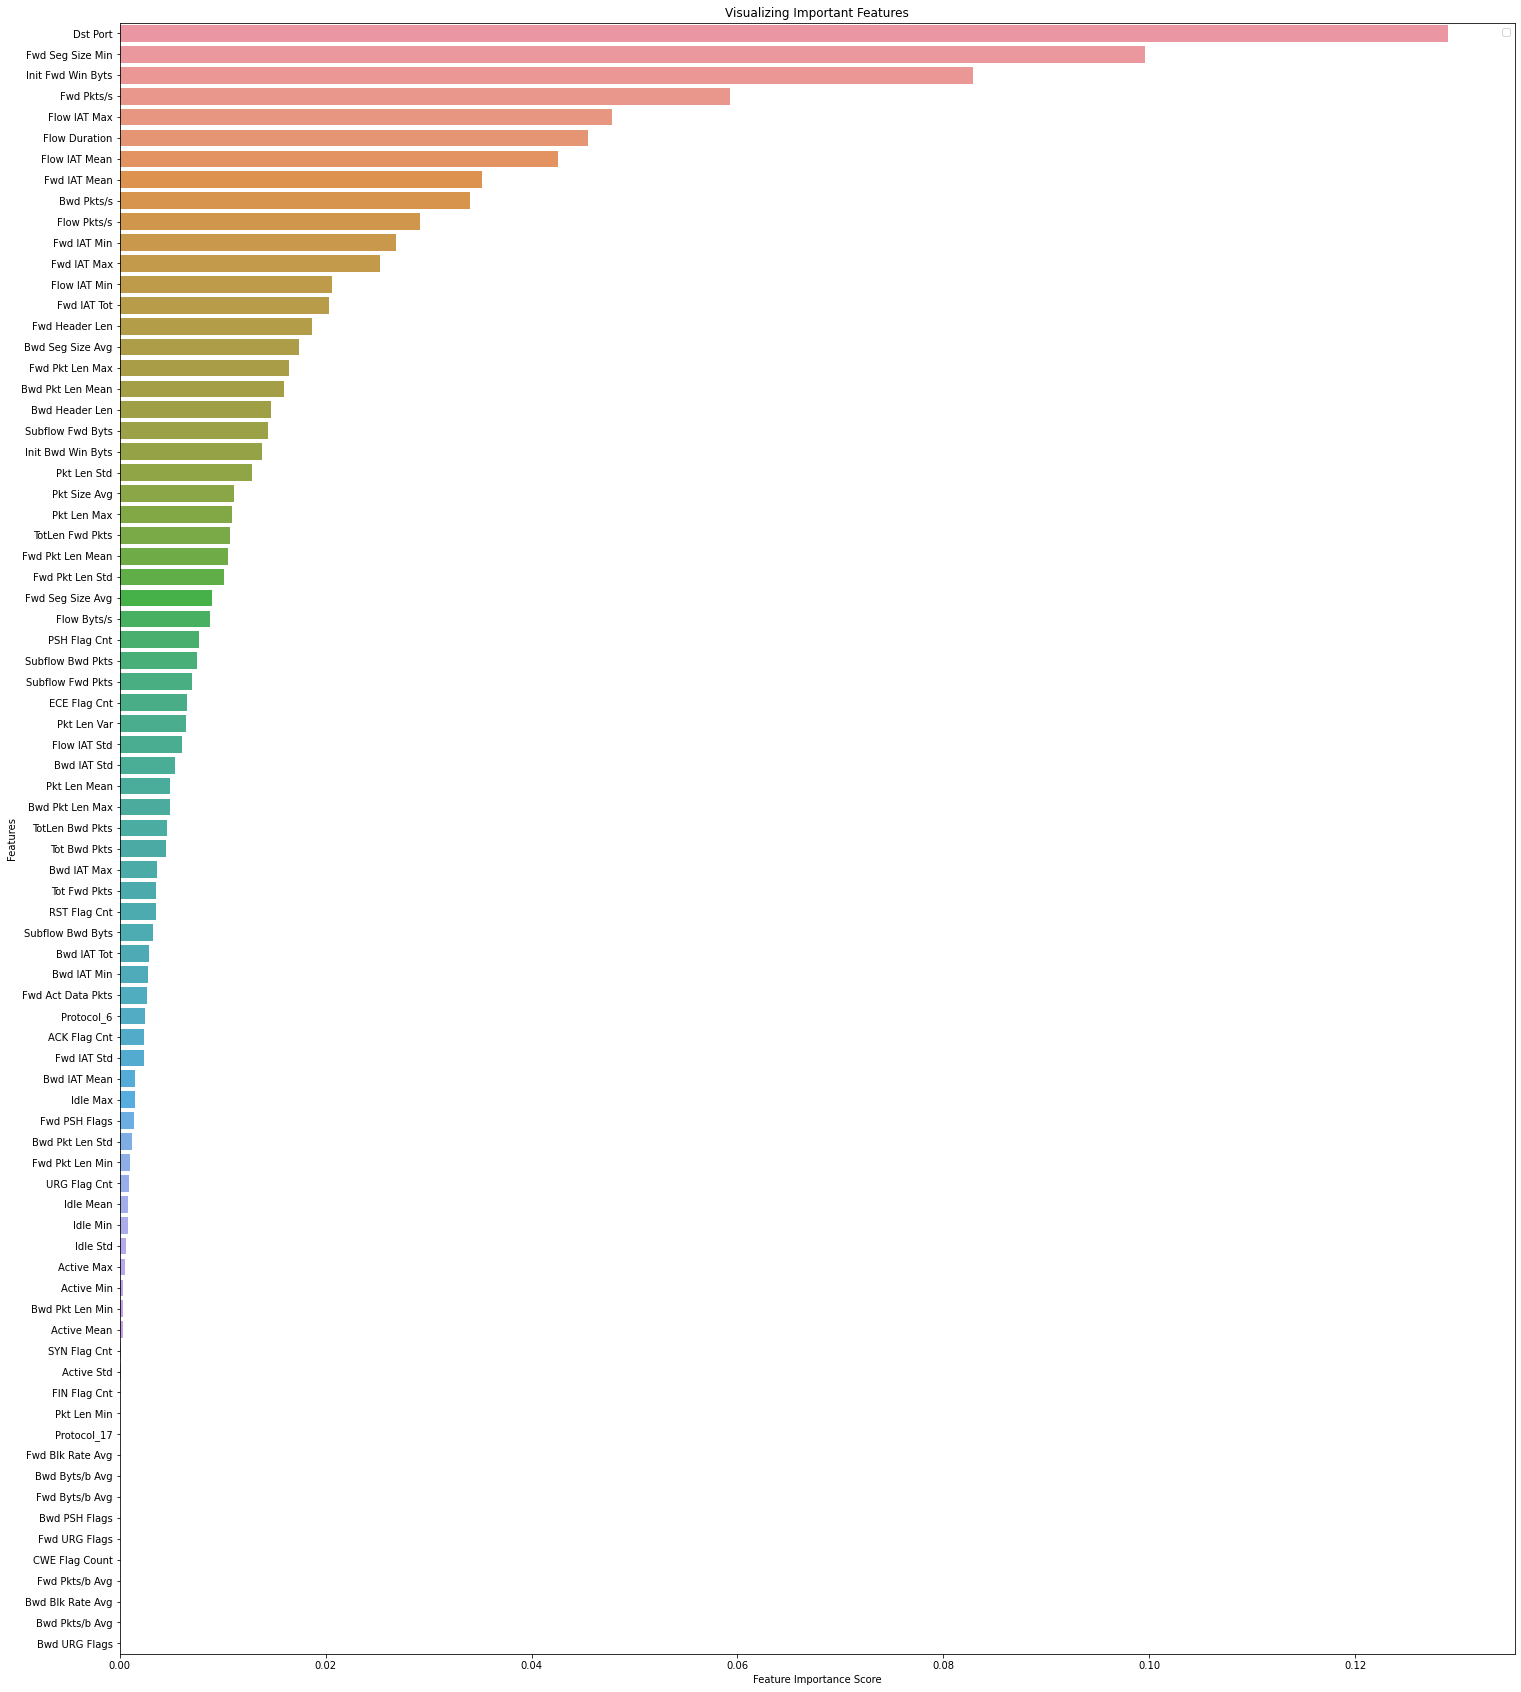

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(25,30))
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()

